# Logistic Regression On Wisconsin Diagnostic Breast Cancer Dataset

In [18]:
import pandas as pd #读csv
import numpy as np
import matplotlib.pyplot as plt

## 读取数据

In [19]:
df = pd.read_csv('/home/ysq/桌面/BreastCancer/wdbc.data',header=None)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

### df.info()返回了数据集的摘要，可以看出：
- 数据集为569*31的矩阵，即有569条数据，每条数据有31个属性
- 属性0为每个样本的唯一ID，这个属性在分类时用不到，可以删除
- 属性1为非数值型数据，是每个数据为良性或恶性的标记，可作为分类的真值
- 属性2~31为数值型数据，这些属性将作为我们分类时用到的属性，可以认为一个数据是否为良性或恶性由这些属性决定
- 该数据集中没有缺失值

## 数据预处理
- 删除ID列，即第0列
- 对2~31列的数据标准化处理
- 为标签编码
- 增广矩阵：添加一个全1列为偏置做准备

In [21]:
#df = df[~df[0].isin([911296202,865423,8610862])]
#删除第0列
df_ = df.drop(df.columns[0],axis=1)
print(df_.shape) #显示是否删除成功
if df_.shape[1] == df.shape[1]-1:
    print("删除成功")

(569, 31)
删除成功


In [22]:
df_.head() #查看当前数据

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#实例化
df_tmp = df_.drop(df.columns[1],axis=1)
std = scaler.fit_transform(df_tmp) #ndarray
#将ndarray转为dataframe
df_std = pd.DataFrame(std)
df_std.shape

(569, 30)

### 统计数据集中良性(benign)和恶性(malignant)的个数

In [24]:
label_list = df_[1].values.tolist() #将标签列转为列表
dict(zip(*np.unique(label_list, return_counts=True)))
# 有357个良性，212个恶性 
print(label_list)

['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',

### 对标记列进行one-hot编码
- 将M--恶性 编码为1，将B-- 良性编码为0

In [25]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()#实例化
label = coder.fit_transform(label_list) #y空间
print(label.shape)
#将M--恶性 编码为1，将B-- 良性编码为0

(569,)


### 对整个数据集进行扩展，增加偏置，为每个样本x增加一列全1的列向量

In [26]:
df_std['bias'] = np.ones(df_std.shape[0])

#### 将编码后的列作为属性label加入df_std(已标准化后的dataframe)
当前，所有数据已被标准化，data就是X空间，label就是Y空间 

In [27]:
data = df_std.values #X空间

## 构建模型

### 预测函数h 以及几个辅助函数

In [28]:
import math
def compute_hypothesis(row_vector,theta):
    """
        计算一个行向量（如我们训练集中的某一行）在参数theta下的预测输出
        theta为一个列向量
        实际意义是：该输出代表着该样本有多大概率为恶性,输出为float64且介于0~1
    """
   #print("行向量维数:",row_vector.shape,'\n',"theta维数",theta.shape)
    foo = row_vector@theta #向量内积
    #numpy算出来的值是ndarray，需要转换，这里直接取出来就好
    #foo = foo[0][0] #取出内积的实数值
    denominator = 1+math.exp(-1*foo)
    return 1/denominator

def hypothesis(X,theta):
    """
        ----
        该函数用于计算预测值的向量形式
        ----
        参数： X:数据矩阵，每一行为一个数据
          theta:参数列向量
        返回值：h_theta 是一个列向量，表明当前训练集下每个样本的预测值
    """
    h_theta = []#一个用于接收theta每个分量的列表
    for i in range(X.shape[0]):
        theta_i = compute_hypothesis(X[i],theta)
        h_theta.append(theta_i)
    h_theta = np.array(h_theta) #将list转为ndarray
    #print(h_theta.shape)
    return h_theta
def ln_on_vector(column_vector):
    """
        对一个列向量中所有值进行取自然对数，返回一个列向量
    """
    ln_list = []#用于接收对数值的列表
    for i in range(column_vector.shape[0]):
        foo = math.log(column_vector[i])#计算自然对数
        ln_list.append(foo)#添加进列表
    return np.array(ln_list)

In [29]:
class LogisticRegression:
    def __init__(self,X_train,y_train):
        """
            初始化传入训练集X_train,y_train, datatype为list类型
            theta为模型的参数
        """
        self.X_train = X_train
        self.y_train = y_train.reshape(y_train.shape[0],-1) #把标签拉成列向量
        self.theta = np.zeros(X_train.shape[1]).reshape(-1,1) 
        ###
            #self.theta一定要reshape不然后面梯度下降会出错，矩阵运算出错！！！！
        ###
        #print(self.theta.shape,self.theta)
    def cost_function(self):
        """
            计算代价函数
        """
        #获取当前训练集中每个样本的预测值列向量
        h_theta = hypothesis(self.X_train,self.theta)
        #获取样本总个数
        n = self.X_train.shape[0]
        tmp1 = ln_on_vector(h_theta).reshape(-1,1)#拉成列向量
        tmp2 = ln_on_vector((np.ones(h_theta.shape[0])-h_theta).reshape(-1,1))
        one = np.ones(self.y_train.shape[0]).reshape(-1,1)
        tmp3 = one - self.y_train
        J = -1/n*((self.y_train.T)@tmp1+tmp3.T@tmp2)
        print("当前代价函数为:",J)
    
    def compute_gradient(self):
        """
            计算代价函数J关于theta的导数
            返回一个导数列向量
        """
        n = self.X_train.shape[0]#训练集样本个数
        h_theta = hypothesis(self.X_train,self.theta).reshape(-1,1)#预测列向量
        return 1/n*(self.X_train.T@(h_theta-self.y_train))
    
    def gradient_descent(self):
        """
            梯度下降优化theta值
            设置50次迭代
            返回最后一次的theta向量作为输出
        """
        iteration = 50#五十轮迭代
        alpha = 0.01 #搜索步长
        
        #######
        
        #迭代里面有问题！
        
        ########
        for i in range(iteration):
            print("现在是第",i,"次迭代")
            gradient = self.compute_gradient() #计算导数
            print("梯度的维度是：",gradient.shape)
            print("梯度的范数是:",np.linalg.norm(gradient))
            self.theta = self.theta - alpha*gradient
            cost = self.cost_function()#计算代价函数值
        return self.theta

### 代价函数计算公式
![jupyter](https://img-blog.csdnimg.cn/20181026205758535.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3djeTcwODcwOA==,size_27,color_FFFFFF,t_70)

### 代价函数关于theta的导数以及梯度下降更新公式
![jupyter](https://img-blog.csdnimg.cn/20181026205758560.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3djeTcwODcwOA==,size_27,color_FFFFFF,t_70)

## 绘制混淆矩阵的函数

In [30]:
#绘制混淆矩阵
def confusion_matrix(matrix):
    """
        传入混淆矩阵，绘制图像
    """
    guess = ["malignant","benign"]
    fact = [ "malignant","benign"]
    classes = list(set(fact))
    classes.sort(reverse=True)
    r1=matrix

    plt.figure(figsize=(8,5))       #设置plt窗口的大小
    confusion =r1
    print("confusion",confusion)
    plt.imshow(confusion, cmap=plt.cm.Blues)
    indices = range(len(confusion))
    indices2 = range(3)
    plt.xticks(indices, classes,rotation=40,fontsize=18)
    plt.yticks([0.00,1.00], classes,fontsize=18)
    plt.ylim(1.5 , -0.5)   #设置y的纵坐标的上下限

    plt.title("Confusion matrix",fontdict={'weight':'normal','size': 18})
    #设置color bar的标签大小
    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.xlabel('Predict label',fontsize=18)
    plt.ylabel('True label',fontsize=18)

    print("len(confusion)",len(confusion))
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            if confusion[first_index][second_index]>200:
                color="w"
            else:
                color="black"
            plt.text(first_index, second_index, confusion[first_index][second_index],fontsize=18, color = color,verticalalignment='center',horizontalalignment='center',)
    plt.show()

## 进行训练集和测试集的划分
- 使用5折分层交叉验证


------------------第 1 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4526893615643175
当前代价函数为: [[0.67239931]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4038267400331224
当前代价函数为: [[0.65302175]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3569287448941472
当前代价函数为: [[0.63491392]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3121239873890085
当前代价函数为: [[0.61797788]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.26947425407414
当前代价函数为: [[0.60212013]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2289853979572605
当前代价函数为: [[0.58725275]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1906199241584896
当前代价函数为: [[0.57329404]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.154309170022938
当前代价函数为: [[0.56016883]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1199638645193415
当前代价函数为: [[0.54780834]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0874825964411423
当前代价函数为: [[0.53614997]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0567582079059925
当前代价函数为: [[0.52513692]]
现在是第 11 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.027682380023122
当前代价函数为: [[0.51471773]]
现在是第 12 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.000

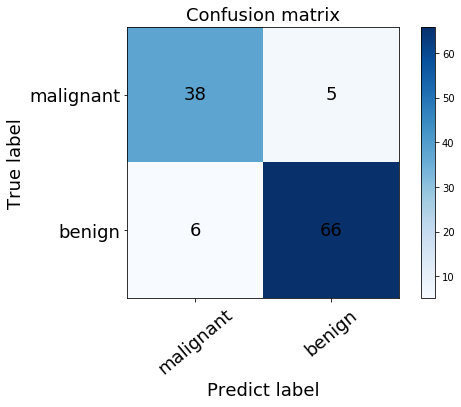

分类正确个数: 104 总样本个数: 115 正确率: 0.9043478260869565

-------------------------------------------------------


------------------第 2 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4182189900192723
当前代价函数为: [[0.67335342]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3731709480621632
当前代价函数为: [[0.65479553]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.329820535353236
当前代价函数为: [[0.63738821]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2882636414589157
当前代价函数为: [[0.62104847]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2485482760470765
当前代价函数为: [[0.60569687]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2106817132930987
当前代价函数为: [[0.59125829]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1746389428640003
当前代价函数为: [[0.57766252]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1403710314622881
当前代价函数为: [[0.56484441]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1078125345731675
当前代价函数为: [[0.5527439]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0768875811584424
当前代价函数为: [[0.54130583]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0475145888927408
当前代价函数为: [[0.53047972]]
现在是第 11 次迭代
梯

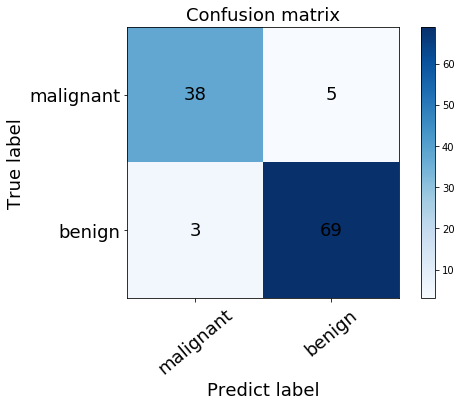

分类正确个数: 107 总样本个数: 115 正确率: 0.9304347826086956

-------------------------------------------------------


------------------第 3 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.396590144346567
当前代价函数为: [[0.673951]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3524555848674484
当前代价函数为: [[0.65594723]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3099968038571927
当前代价函数为: [[0.63905341]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2693109086753402
当前代价函数为: [[0.62318926]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2304466539966594
当前代价函数为: [[0.60827785]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1934115256209612
当前代价函数为: [[0.59424652]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1581801839514612
当前代价函数为: [[0.58102731]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1247028925499407
当前代价函数为: [[0.56855723]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0929130589509657
当前代价函数为: [[0.55677824]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0627334794503167
当前代价函数为: [[0.54563711]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0340812131488102
当前代价函数为: [[0.53508515]]
现在是第 11 次迭代
梯度

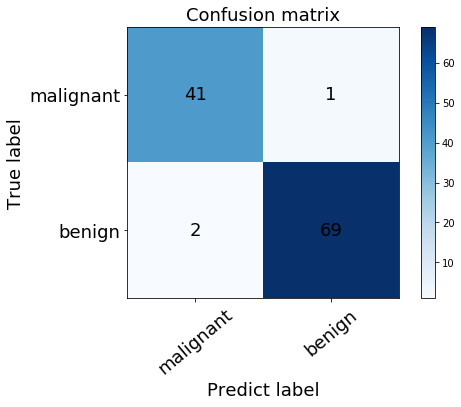

分类正确个数: 110 总样本个数: 113 正确率: 0.9734513274336283

-------------------------------------------------------


------------------第 4 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.4157084861690452
当前代价函数为: [[0.67342655]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3703075000963696
当前代价函数为: [[0.65494864]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3266693957186892
当前代价函数为: [[0.63762588]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.284896311284742
当前代价函数为: [[0.62137312]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2450380660540785
当前代价函数为: [[0.60610889]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.207100147130395
当前代价函数为: [[0.59175636]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1710530518883377
当前代价函数为: [[0.57824382]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.136841500640024
当前代价函数为: [[0.56550495]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1043926023760782
当前代价函数为: [[0.55347876]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0736225644795934
当前代价函数为: [[0.54210944]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0444418927761503
当前代价函数为: [[0.53134605]]
现在是第 11 次迭代
梯度

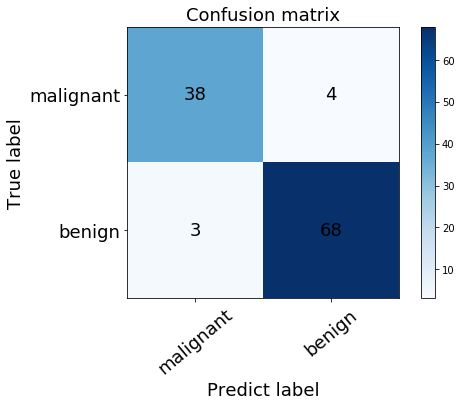

分类正确个数: 106 总样本个数: 113 正确率: 0.9380530973451328

-------------------------------------------------------


------------------第 5 轮
现在是第 0 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.412784985750494
当前代价函数为: [[0.67349967]]
现在是第 1 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3686382925661869
当前代价函数为: [[0.65505934]]
现在是第 2 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.3261219806757247
当前代价函数为: [[0.63774447]]
现在是第 3 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.285313773957521
当前代价函数为: [[0.6214758]]
现在是第 4 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.2462536823033126
当前代价函数为: [[0.60617745]]
现在是第 5 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.208949334203755
当前代价函数为: [[0.59177755]]
现在是第 6 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1733819041234803
当前代价函数为: [[0.57820871]]
现在是第 7 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1395119917233572
当前代价函数为: [[0.56540812]]
现在是第 8 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.1072850209103593
当前代价函数为: [[0.55331766]]
现在是第 9 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0766359204306375
当前代价函数为: [[0.54188371]]
现在是第 10 次迭代
梯度的维度是： (31, 1)
梯度的范数是: 1.0474929986998829
当前代价函数为: [[0.53105703]]
现在是第 11 次迭代
梯度的

len(confusion) 2


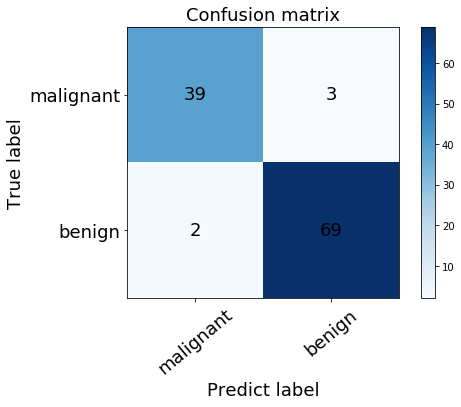

分类正确个数: 108 总样本个数: 113 正确率: 0.9557522123893806

-------------------------------------------------------



In [31]:
from sklearn.model_selection import StratifiedKFold #分层交叉验证
kfold = StratifiedKFold(n_splits=5)#实例化

count = 1 #共5折，表示当前为第几折

#接收每折分类准确率的列表
accuracy = []

#统计TP,FP,TN,FN的列表
statistic_list = []

for train_index,test_index in kfold.split(data,label):
    #print("Train Index:",train_index,",Test Index:",test_index)
    print("\n------------------第",count,"轮")
    
    #划分训练集测试集
    X_train,X_test=data[train_index],data[test_index]#划分X空间
    y_train,y_test=label[train_index],label[test_index]
    
    #进行模型训练 Training
    model_parameter = LogisticRegression(X_train,y_train).gradient_descent()
    print("模型训练完毕！theta参数为:",model_parameter)
    
    #对训练出的模型进行测试 Testing
    correct = 0 #用correct统计被分类正确样本的个数
    
    #统计用于绘制混淆矩阵的信息
    malignat_malignat = 0 #本来是恶性分类为恶性的样本个数  TP
    malignat_benign = 0#本来是恶性分类为良性的样本个数 FN
    benign_malignat = 0#本来是良性分类为恶性的样本个数 FP
    benign_benign = 0#本来是良性分类为良性的样本个数 TN
    
    for i in range(X_test.shape[0]):
        sample = X_test[i] #取出该样本行向量
        prediction = compute_hypothesis(sample,model_parameter)#计算预测值
        print("第",i,"个样本预测值为",prediction,"它的真值是:",y_test[i])
        judge = -1 #做出判决 初始化为-1，最终为1或0
        #生成决策
        if prediction > 0.5:
            judge = 1
        else:
            judge = 0
        if judge == y_test[i]: #若判决与标签一样
            correct = correct + 1
        
        #判断混淆矩阵中的计数器谁该增加
        if y_test[i] == 1 and judge == 1:
            malignat_malignat += 1
        if y_test[i] == 1 and judge == 0:
            malignat_benign += 1
        if y_test[i] == 0 and judge == 1:
            benign_malignat += 1
        if y_test[i] == 0 and judge == 0:
            benign_benign += 1
    #绘制混淆矩阵
    conf_matrix = np.array([[malignat_malignat,benign_malignat],[malignat_benign,benign_benign]])
    confusion_matrix(conf_matrix)    
    
    #输出正确率
    acc = correct/X_test.shape[0]
    accuracy.append(acc)#将准确率添加至列表中
    
    #输出TP,FP,TN,FN
    foo = np.array([malignat_malignat,benign_malignat,benign_benign,malignat_benign])
    statistic_list.append(foo)
    
    print("分类正确个数:",correct,"总样本个数:",X_test.shape[0],"正确率:",acc)
    print("\n-------------------------------------------------------\n")
    count = count + 1

## 查看模型分类的准确率

In [32]:
print("模型准确率向量",accuracy)
overall = np.mean(accuracy)
print("整体准确率",overall)

模型准确率向量 [0.9043478260869565, 0.9304347826086956, 0.9734513274336283, 0.9380530973451328, 0.9557522123893806]
整体准确率 0.9404078491727587


## 计算模型的召回率(灵敏度)、特效性

In [36]:
#根据statistic_list中的数据计算
for item in statistic_list:
    #item的顺序: TP,FP,TN,FN
    recall = item[0]/(item[0]+item[-1]) #TP/(TP+FN)
    specificity = item[2]/(item[1]+item[2])
    print("recall:",recall," specificity:",specificity)

recall: 0.8837209302325582  specificity: 0.9166666666666666
recall: 0.8837209302325582  specificity: 0.9583333333333334
recall: 0.9761904761904762  specificity: 0.971830985915493
recall: 0.9047619047619048  specificity: 0.9577464788732394
recall: 0.9285714285714286  specificity: 0.971830985915493
